##**Linear Regression:**

####In Linear Regression we predict a dependent variable 'y' using the independent variable 'x'. It gives us the best fitting line, that tries to fit all the datapoints of given dataset. 

1. Importing required modules:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Reading dataset using pandas:

In [0]:
from google.colab import files
f = files.upload()

Saving test.csv to test.csv


3. Showing data:

In [0]:
data = pd.read_csv('test.csv')
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


4. Exploring data and its statistical information:

In [0]:
print("Size: ",data.shape)
data.describe()

Size:  (300, 2)


,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


5. Preprocessing Data:

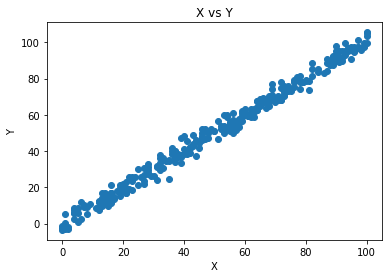

In [0]:
# Initializing X and Y parameters of the equation of line
X = data.iloc[:,0].values # 0 is the (column number-1) of temperature
Y = data.iloc[:,1].values # 1 is the (column number-1) of Humidity
plt.scatter(X,Y)
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

6. Building the model:

In this step we find the intercept(c) and slope(m) which results in a line that best fits the data.

In [0]:
import math
m, c, n = 0.0, 0.0, float(len(X))
L = 0.00001
num_iter = 10000

for i in range(num_iter):
  y_pred = m*X + c

  D_m = (1/n)*(math.fsum((y_pred-Y)*X))
  D_c = (1/n)*(math.fsum(y_pred-Y))


  m -= L*D_m
  c -= L*D_c



print(m,c)

1.0073672967484324 0.0038638491541224886


7. Making predictions and plotting the regression line:

This step plots the best fitting line according to the predicted values found in the previous step.

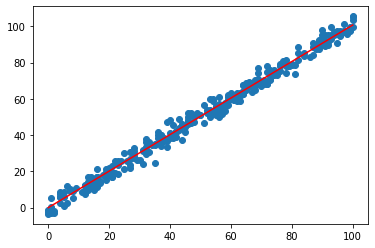

In [0]:
y_predicted = m * X + c  # Regression line
plt.scatter(X,Y)
plt.plot([min(X) , max(X)],[min(y_predicted), max(y_predicted)], color = 'red')
plt.show()

8. Finding Errors:

This step finds the error in predicting the value of independent variable(y). 

In [0]:
rmse = np.sqrt((np.sum(y_predicted - Y)**2)/n)
rmse

1.9181589091295508



---



##**KNN algorithm**

The k-Nearest Neighbors Algorithm is one of the simplest but strong supervised algorithm. The following code snippets is the implementation of KNN algorithm from sratch in Python.

1. Importing required packages and loading dataset:

In [0]:
import pandas as pd
import numpy as np
import math
import operator
from google.colab import files
f = files.upload()

Saving IRIS.csv to IRIS.csv


In [0]:
data = pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The following code snippet uses the following algorithm:
  
  1. Initializing the number of neighbors to be considered (k).
  2. For each tuple in dataset perform:

          a. Calculate Euclidean distance between point to be classified and each datapoint. 
          b. Add the distance calculated to given datapoint in the file.
          c. Sort the datapoints in ascending order of distances.

  3. Picking up K neighbors from the sorted datapoints.

  The output of the program shows the classification based on the number of different neighbors.

In [0]:

def euclidean_Distance(p1, p2, length):
  d = 0
  for i in range(length):
    d += np.square(p1[i] - p2[i])
  return np.sqrt(d)


def knn(trainData, testData, k):
  distance = {}
  length = testData.shape[1]
  for i in range(len(trainData)):
    # Calculating euclidean distance between datapoint to be classified with each datapoint of the file
    d = euclidean_Distance(testData, trainData.iloc[i], length)
    distance[i] = d[0]  # Adding distance corresponding to data points in the file
  sort_distance = sorted(distance.items(), key = operator.itemgetter(1))  # Sorting data in file in ascending order of distances.
  neighbors = []
  for i in range(k):  # Picking up first K entries from sorted data
    neighbors.append(sort_distance[i][0])
  count = {}
  for i in range(len(neighbors)):
    result = trainData.iloc[neighbors[i]][-1]
    if result in count:
      count[result] += 1
    else:
      count[result] = 1
    sort_count = sorted(count.items(), key = operator.itemgetter(1), reverse = True) # Getting most frequent data
  return (sort_count[0][0], neighbors)



test_Data = [[6.7,5,7,4.9]]  # Creating test data
test = pd.DataFrame(test_Data)

# value k is the number of neighbors to be considered 
k1 = 1
k2 = 3
k3 = 10

res, neighbor = knn(data,test,k1)
res1, neighbor1 = knn(data,test,k2)
res2, neighbor2 = knn(data,test,k3)
print("For just one neighbor:")
print(res)
print(neighbor)
print("For 3 neighbors:")
print(res1)
print(neighbor1)
print("For 10 neighbors:")
print(res2)
print(neighbor2)



For just one neighbor:
Iris-virginica
[109]
For 3 neighbors:
Iris-virginica
[109, 100, 117]
For 10 neighbors:
Iris-virginica
[109, 100, 117, 144, 136, 143, 131, 120, 140, 148]




---



##**K-means Algorithm:**

When we are given a dataset of items with certain features and we need to categorize them into groups, we use K-means Algorithm. It is an unsupervised machine learning algorithm. The algorithm will categorize the items into k-groups of similiarity.

The following code snippets show its working.

1. Importing required packages and loading dataset:

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
f = files.upload()

Saving irisDataset.csv to irisDataset.csv


In [0]:
data = pd.read_csv('irisDataset.csv', header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Implementing algorithm:

The code snippets run the following algorithm:

      a. Choosing some value of k.
      b. Selecting k features to calculate centroids.
      c. Calculating distance of other features with the closest centroid.
      d. Classifying those features.
      e. Taking mean of each class of flowers and creating new centroid
      f. Repeating same process until function is optimized.

The output of the code results into a plot with 2 different clusters. 


In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets import load_iris

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
df.head()
x = df.loc[:,['sepal length (cm)','petal length (cm)']].values

212.8785889355744
12.940630797773661
23.336230817612513
1.1154231175485703
4.52835178462711
0.5215185955941946
2.2998451168107796
{0: [array([7. , 4.7]), array([6.4, 4.5]), array([6.9, 4.9]), array([5.5, 4. ]), array([6.5, 4.6]), array([5.7, 4.5]), array([6.3, 4.7]), array([6.6, 4.6]), array([5.2, 3.9]), array([5.9, 4.2]), array([6., 4.]), array([6.1, 4.7]), array([5.6, 3.6]), array([6.7, 4.4]), array([5.6, 4.5]), array([5.8, 4.1]), array([6.2, 4.5]), array([5.6, 3.9]), array([5.9, 4.8]), array([6.1, 4. ]), array([6.3, 4.9]), array([6.1, 4.7]), array([6.4, 4.3]), array([6.6, 4.4]), array([6.8, 4.8]), array([6.7, 5. ]), array([6. , 4.5]), array([5.7, 3.5]), array([5.5, 3.8]), array([5.5, 3.7]), array([5.8, 3.9]), array([6. , 5.1]), array([5.4, 4.5]), array([6. , 4.5]), array([6.7, 4.7]), array([6.3, 4.4]), array([5.6, 4.1]), array([5.5, 4. ]), array([5.5, 4.4]), array([6.1, 4.6]), array([5.8, 4. ]), array([5.6, 4.2]), array([5.7, 4.2]), array([5.7, 4.2]), array([6.2, 4.3]), array([5.7, 

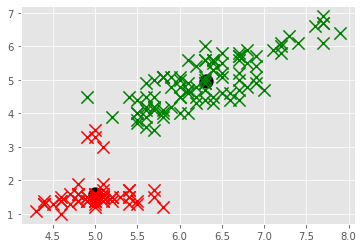

In [75]:
class Kmeans:
  #value of k is 2
  def __init__(self, k=2, tol=0.01, max_iter=150):
    self.k = k
    self.tol = tol  # Used to optimize the function
    self.max_iter = max_iter # Number of cycles we want to run
  
  def fit(self,data):
    # Starting with empty classification
    self.centroids = {}

    for i in range(self.k):
      self.centroids[i] = data[i]
    
    for i in range(self.max_iter):
      self.classifications = {}
    
      for i in range(self.k):
        self.classifications[i] = []
    
      for feature in data: # Looping through features
        # Calculating distance of features with current centroids
        distances = [np.linalg.norm(feature-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(feature)
      prev_centroids = dict(self.centroids)
      
      for classification in self.classifications:
        self.centroids[classification] = np.average(self.classifications[classification], axis=0)
    
      optimized = True  # Function is optimized if the current value of centroid is less than tolerance.
      # Checking whether optimized
      for c in self.centroids:
        # Taking all centroids and comparing with previous centroids
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        
        if np.sum((current_centroid - original_centroid)/original_centroid * 100.0) > self.tol:
          print(np.sum((current_centroid - original_centroid)/original_centroid*100.0))
          optimized = False

      if optimized:
        break
    print(self.classifications)
    
# Prediction      
  def predict(self,data):
    distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification

colors = 10*["g","r","c","b","k"]
clfn = Kmeans()
clfn.fit(x)
for centroid in clfn.centroids:
  plt.scatter(clfn.centroids[centroid][0], clfn.centroids[centroid][1], marker="o", color="k", s=150, linewidths=2)

for classification in clfn.classifications:
  color = colors[classification]
  for feature in clfn.classifications[classification]:
    plt.scatter(feature[0], feature[1], marker="x", color=color, s=150, linewidths=2)
plt.show()